# Problem Set 3
## Ying Sun

In [1]:
# import packages
import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Exercise 2.1

In [2]:
# set the parameters
nvec = np.array([1, 1, 0.2])
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
SS_tol = 1e-9
f_params = [nvec, A, alpha, delta]

In [3]:
# define functions  to compute K, r, w, Y, consumption
def get_K(b2, b3):
    return b2 + b3

def get_r(K, L, alpha, delta, A):
    return A * alpha * ((L / K) ** (1 - alpha)) - delta

def get_w(K, L, alpha, A):
    return A * (1 - alpha) * ((K / L) ** alpha)

def get_cons(b_s, b_s_1, n_s, r, w):
    return w * n_s + (1 + r) * b_s - b_s_1

def get_util(c, sigma = 3):
    return (c ** (1-sigma))/(1-sigma)

def get_MU(c, sigma = 3):
    return c ** (-sigma)

def get_Y(K, L, alpha, A):
    return A * (K ** alpha) * (L ** (1-alpha))

def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = b2 + b3
    L = nvec.sum()
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    b_cnstr = np.zeros(2, dtype = 'bool')
    c_cnstr = np.zeros(3, dtype = 'bool')
    K_cnstr = ((b2 + b3)<=0)
    c_cnstr[0] = (c1<=0)
    c_cnstr[1] = (c2<=0)
    c_cnstr[2] = (c3<=0)
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, K_cnstr

### a.

In [4]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print (feasible(f_params, bvec_guess))

(array([ True, False]), array([ True, False, False]), False)


Based on the result above, the constrain for the first period consumption is violated for the initial guess of steady-state savings of  bvec_guess = np.array([1.0, 1.2])

### b.

In [5]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print (feasible(f_params, bvec_guess))

(array([False, False]), array([False, False, False]), False)


Based on the result above, no constrain is violated for the initial guess of steady-state savings of  bvec_guess = np.array ([0.06, -0.001])

### c.

In [6]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print (feasible(f_params, bvec_guess))

(array([False, False]), array([False, False, False]), False)


Based on the result above, no constrain is violated for the initial guess of steady-state savings of  bvec_guess = np.array ([0.1, 0.1])

## Exercise 2.2

In [7]:
def EulEqs(bvec, f_params):
    nvec, A, alpha, delta, beta = f_params
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r) * MU2
    Eul2 = MU2 - beta*(1+r) * MU3
    Euler_eqs = np.array([Eul1, Eul2])
    return Euler_eqs

In [8]:
def get_SS(params, bvec_guess, SS_graphs = False):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    f_params = np.array([nvec, A, alpha, delta, beta])
    b_ss = opt.root(EulEqs, bvec_guess, args = (f_params)).x
    b2, b3 = b_ss
    K_ss = get_K(b2, b3)
    r_ss = get_r(K_ss, L, alpha, delta, A)
    Y_ss = get_Y(K_ss, L, alpha, A)
    w_ss = get_w(K_ss, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r_ss, w_ss)
    c2 = get_cons(b2, b3, nvec[1], r_ss, w_ss)
    c3 = get_cons(b3, 0, nvec[2], r_ss, w_ss)
    c_ss = np.array([c1, c2, c3])
    C_ss = c_ss.sum()
    EulErr_ss = EulEqs(b_ss, f_params)
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs:
        fig, ax = plt.subplots()
        ax.plot(np.arange(1,4), c_ss, marker = 'o', label = 'consumptions in equilibrium')
        ax.plot(np.arange(2,4), b_ss, marker = 'o', label = 'savings in equilibrium')
        ax.legend()
        ax.grid()
        ax.set_title('Consumptions and Savings in Equilibrium')
        plt.show()
    return ss_output

### a.

In [9]:
params = [beta, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
bvec_guess = np.array([0.1, 0.1])
ss_output = get_SS(params, bvec_guess)

In [12]:
print('Steady-state equilibrium values for savings are',ss_output['b_ss'])
print('Steady-state equilibrium values for consumptions are',ss_output['c_ss'])
print('Steady-state equilibrium value for wage is',ss_output['w_ss'])
print('Steady-state equilibrium value for interest rate is',ss_output['r_ss'])
print('Steady-state equilibrium value for capital is',ss_output['K_ss'])
print('Steady-state equilibrium value for output is',ss_output['Y_ss'])
print('Steady-state equilibrium value for total consumption is',ss_output['C_ss'])
print('Steady-state equilibrium values for Euler errors are',ss_output['EulErr_ss'])
print('Steady-state equilibrium value for resource constraint error is',ss_output['RCerr_ss'])
print('Time to compute steady-state equilibrium is', ss_output['ss_time'], 'seconds')

Steady-state equilibrium values for savings are [0.01931253 0.0584111 ]
Steady-state equilibrium values for consumptions are [0.18241213 0.20961468 0.24087387]
Steady-state equilibrium value for wage is 0.20172465739052575
Steady-state equilibrium value for interest rate is 2.433062339127069
Steady-state equilibrium value for capital is 0.07772362575316386
Steady-state equilibrium value for output is 0.6827603788602411
Steady-state equilibrium value for total consumption is 0.6329006729395864
Steady-state equilibrium values for Euler errors are [-1.39266376e-12  2.62900812e-12]
Steady-state equilibrium value for resource constraint error is 8.326672684688674e-17
Time to compute steady-state equilibrium is 0.0008309999999998041 seconds


Based on the result above, it took 0.0008309999999998041 seconds to compute the steady-state.

### b.

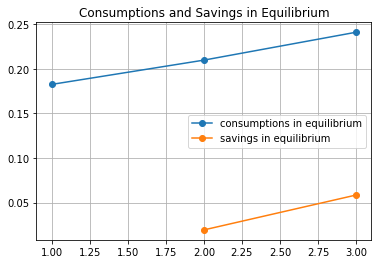

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0004739999999998634}

In [10]:
get_SS(params, bvec_guess, True)

### c.

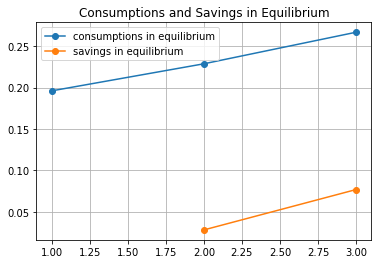

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.00038299999999980017}

In [11]:
params2 = [0.55, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
get_SS(params2, bvec_guess, True)

If all households become more patient, we reach to the new steady state. Compared with previous steady state, we can find at the new steady state, wage, saving and consumption in all three periods all higher than before. Notice that interest rate is lower compared with previous steady state. The intuition is that when the people become more patient, they would save more even given the same interest rate, so the interest rate should decrease to keep people indifferent to the selections between consumption and savings. When the savings increases, the aggregate capital increase too. It increases the the marginal productivity of labor so the wage increases. So at the new steady state, people have a higher consumptions and higher savings.

## Exercise 2.3

### a.

In [12]:
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "       difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

### a. 

In [13]:
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 25
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [14]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)

iteration:  1        difference:  0.0026923268543442304
iteration:  2        difference:  0.002157561740107384
iteration:  3        difference:  0.0017408174700849325
iteration:  4        difference:  0.0014142121894262733
iteration:  5        difference:  0.0011567365684827385
iteration:  6        difference:  0.0009525098783005804
iteration:  7        difference:  0.0007894893845593562
iteration:  8        difference:  0.0006585123205853974
iteration:  9        difference:  0.0005525827671266743
iteration:  10        difference:  0.0004663394689037951
iteration:  11        difference:  0.00039565771612220233
iteration:  12        difference:  0.0003373508229514696
iteration:  13        difference:  0.00028894577394323863
iteration:  14        difference:  0.00024851422573664284
iteration:  15        difference:  0.00021454491036903037
iteration:  16        difference:  0.00018584706684335225
iteration:  17        difference:  0.00016147717292832388
iteration:  18        difference:  

In [15]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

In [16]:
Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], \
                               beta, alpha, delta, sigma, A, nvec)

In [17]:
print('Maximum of the absolute values of all the Euler errors across the entire time path is', np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors across the entire time path is', np.abs(RCerr_path).max())

Maximum of the absolute values of all the Euler errors across the entire time path is 37.40392775466482
Maximum of the absolute values of all the resource constraint errors across the entire time path is 0.0057734276923919435


### b.

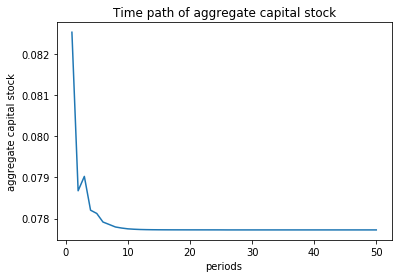

In [18]:
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('periods')
plt.ylabel('aggregate capital stock')
plt.title('Time path of aggregate capital stock')
plt.show()

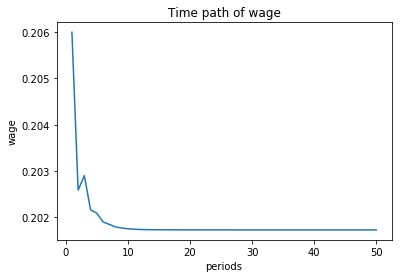

In [19]:
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('periods')
plt.ylabel('wage')
plt.title('Time path of wage')
plt.show()

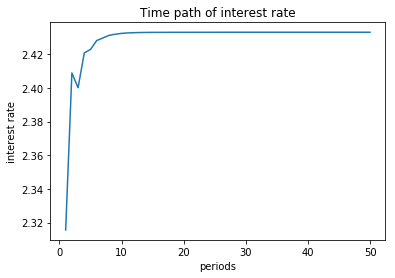

In [20]:
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('periods')
plt.ylabel('interest rate')
plt.title('Time path of interest rate')
plt.show()

### c.

In [23]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('It took {} periods to get within 0.00001 of the steady-state aggregate capital stock'.format(int(K_path[i, 0])))
        break

It took 13 periods to get within 0.00001 of the steady-state aggregate capital stock


In [27]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period {}".format(int(K_path[i, 0])))
        break

The period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state is period 13
